In [2]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
from random import gauss
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from random import random
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing, Holt

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
class CFG:
    img_dim1 = 20
    img_dim2 = 10
    
plt.rcParams.update({'figure.figsize':(CFG.img_dim1, CFG.img_dim2)})

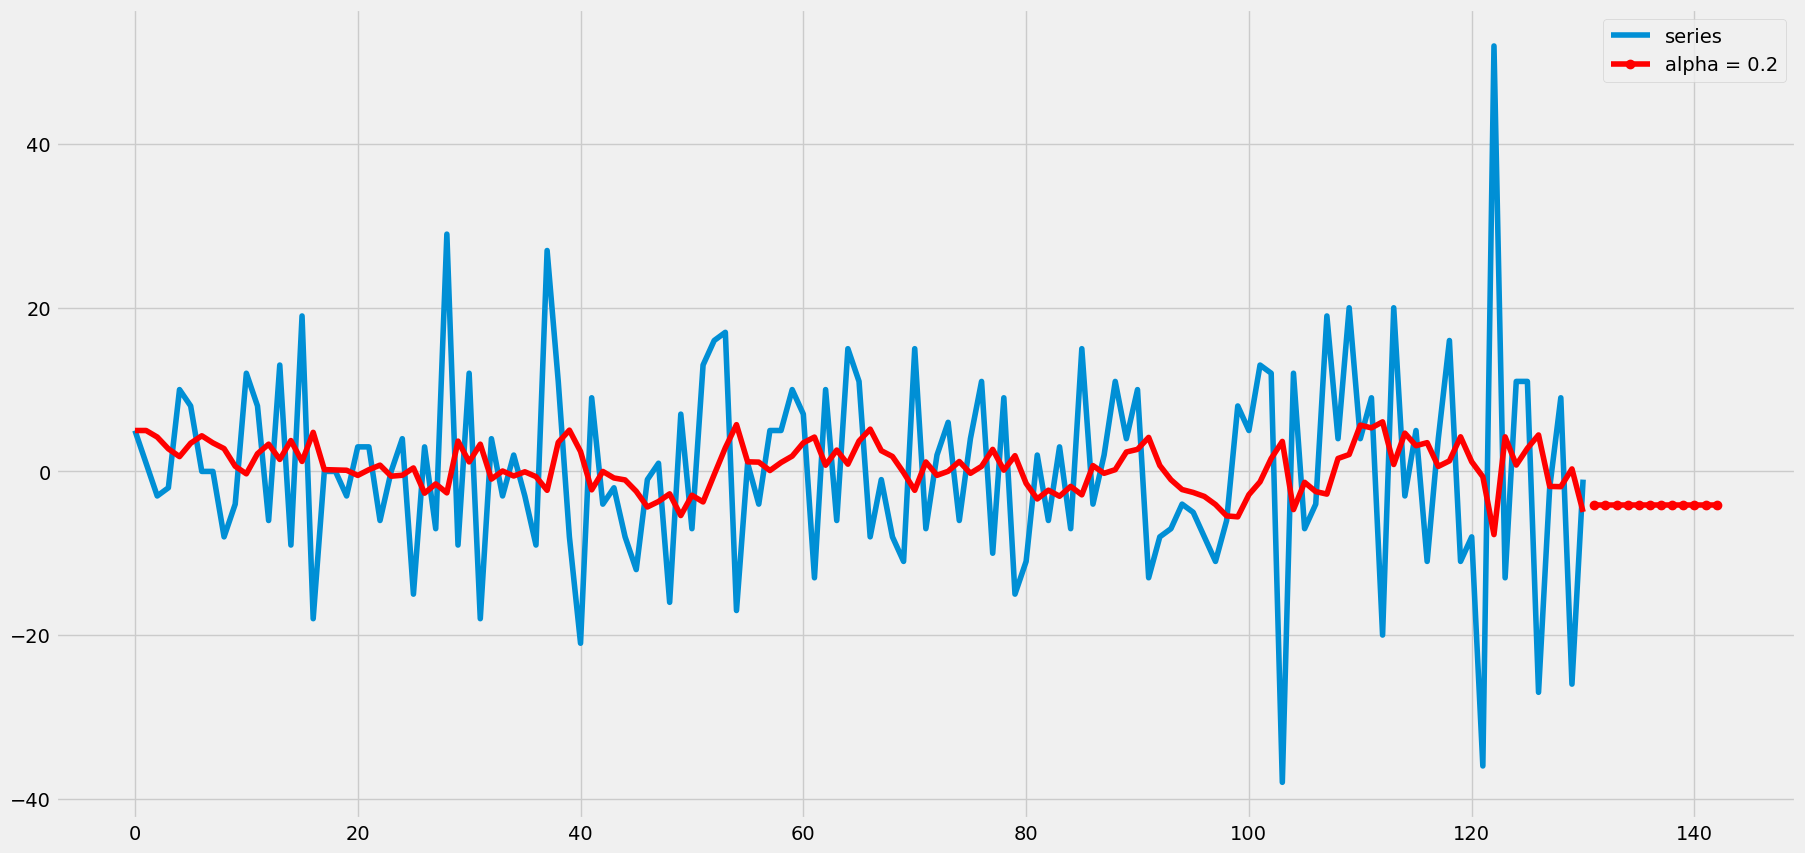

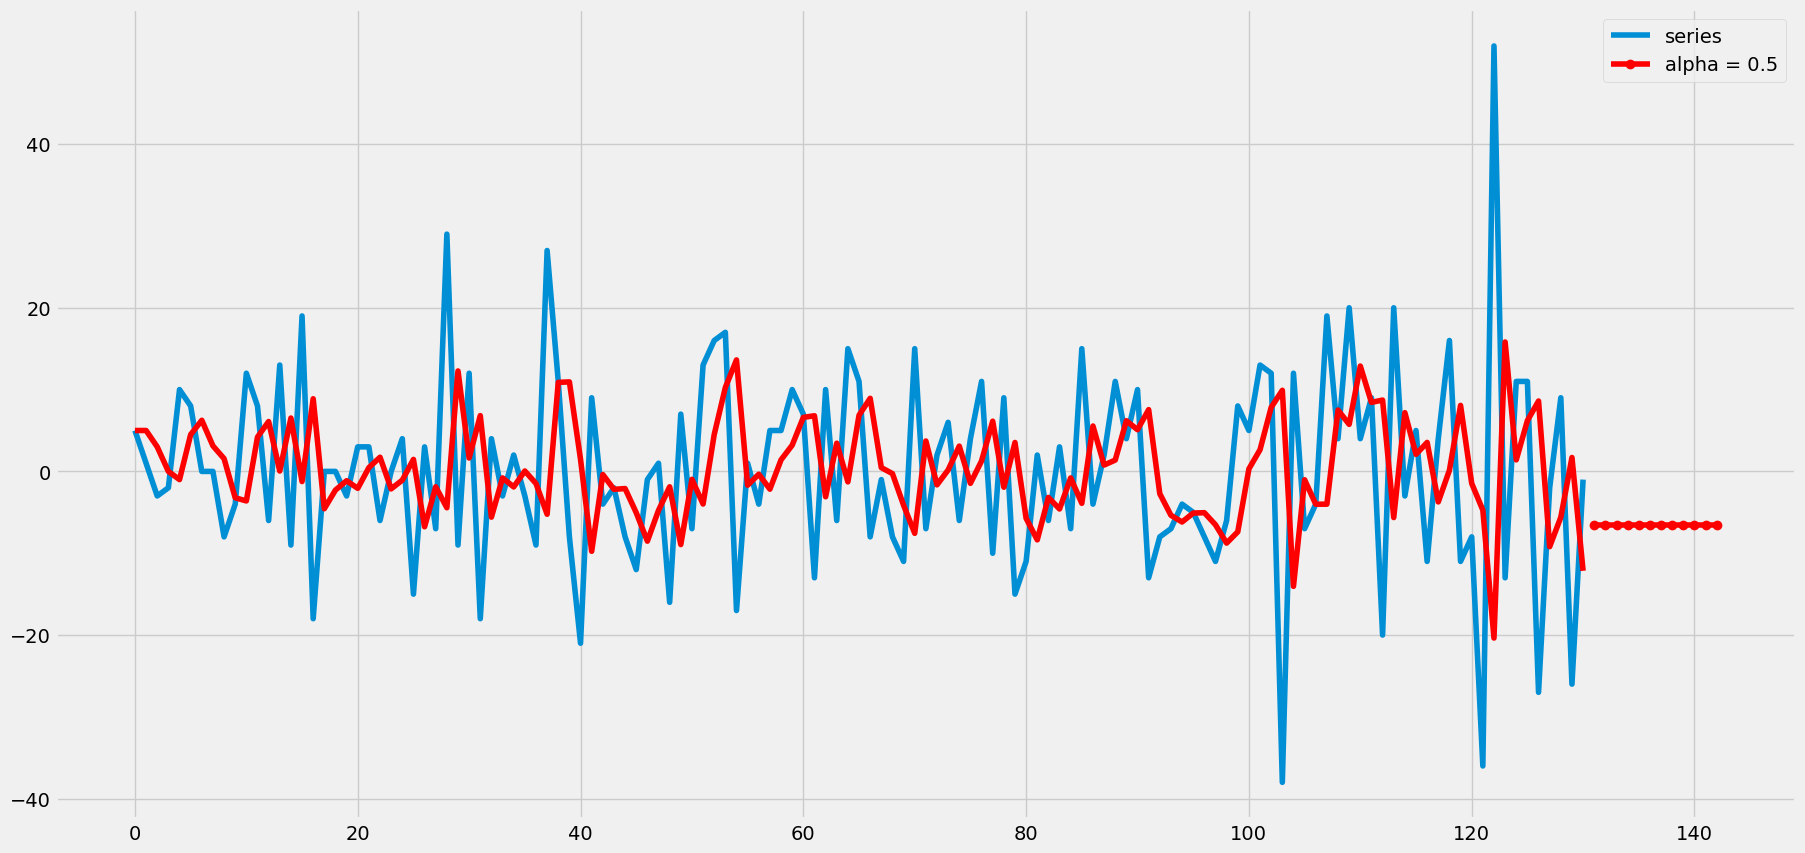

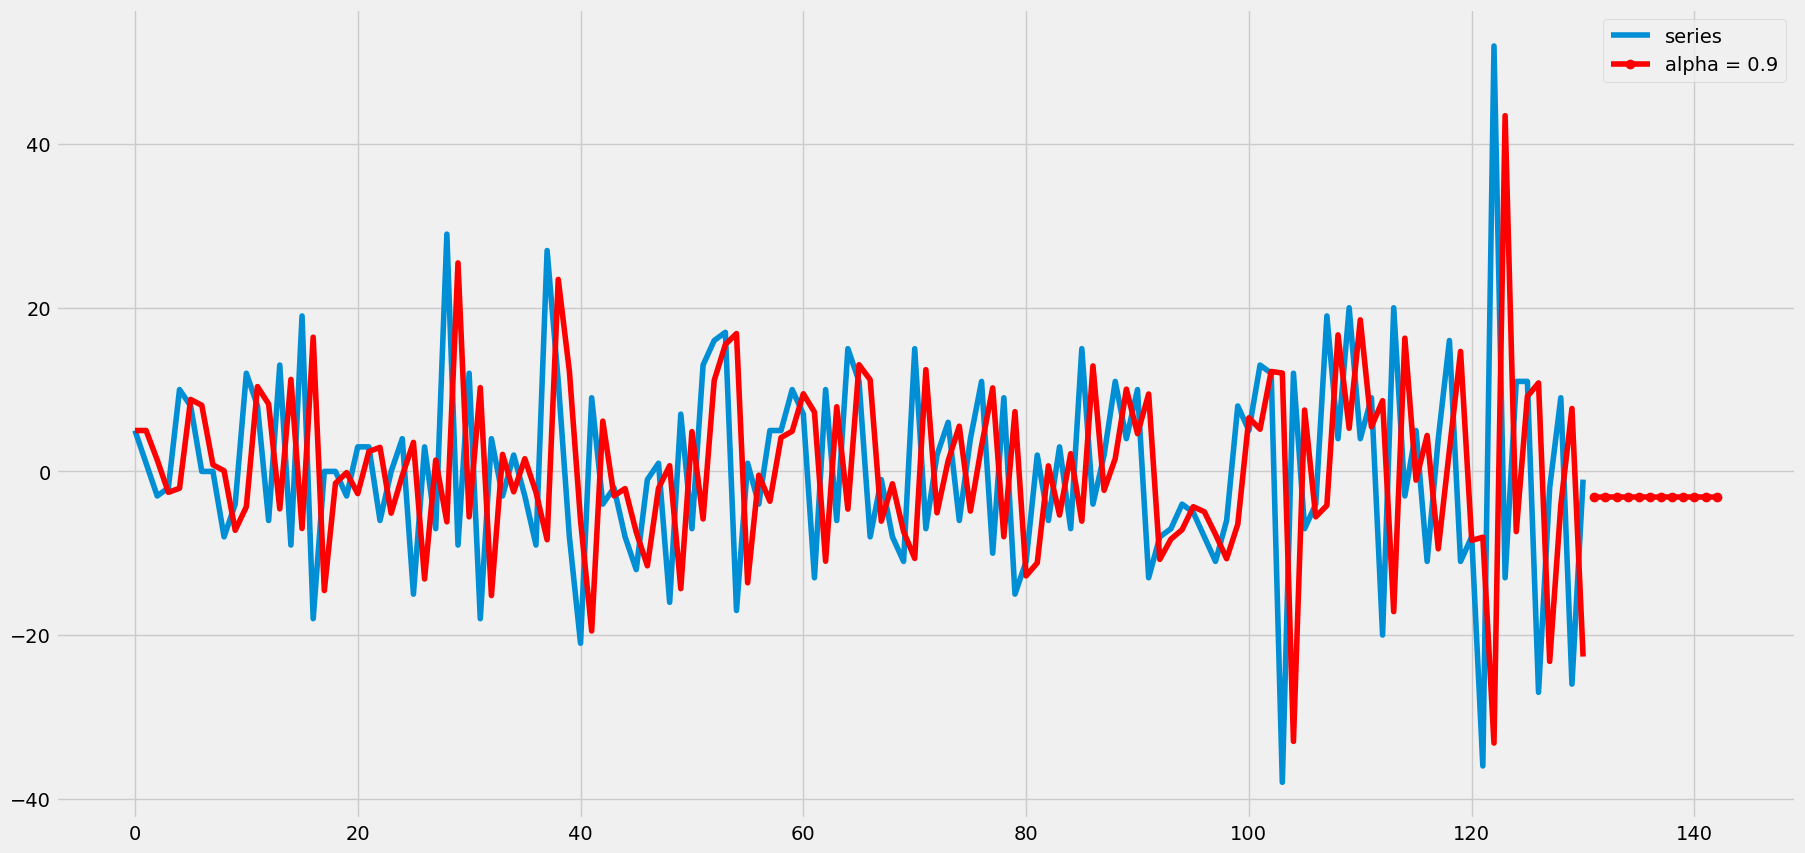

In [4]:
for alpha_sm in [0.2,0.5,0.9]:
    df = pd.read_csv('datasets/exp1.csv', header= None); df.columns = ['series']
    df.plot.line()
    fit1 = SimpleExpSmoothing(df).fit(smoothing_level = alpha_sm, optimized=False)
    fcast1 = fit1.forecast(12).rename('alpha = '+ str(alpha_sm))
    fcast1.plot(marker='o', color='red', legend=True)
    fit1.fittedvalues.plot(color='red')
    plt.show()

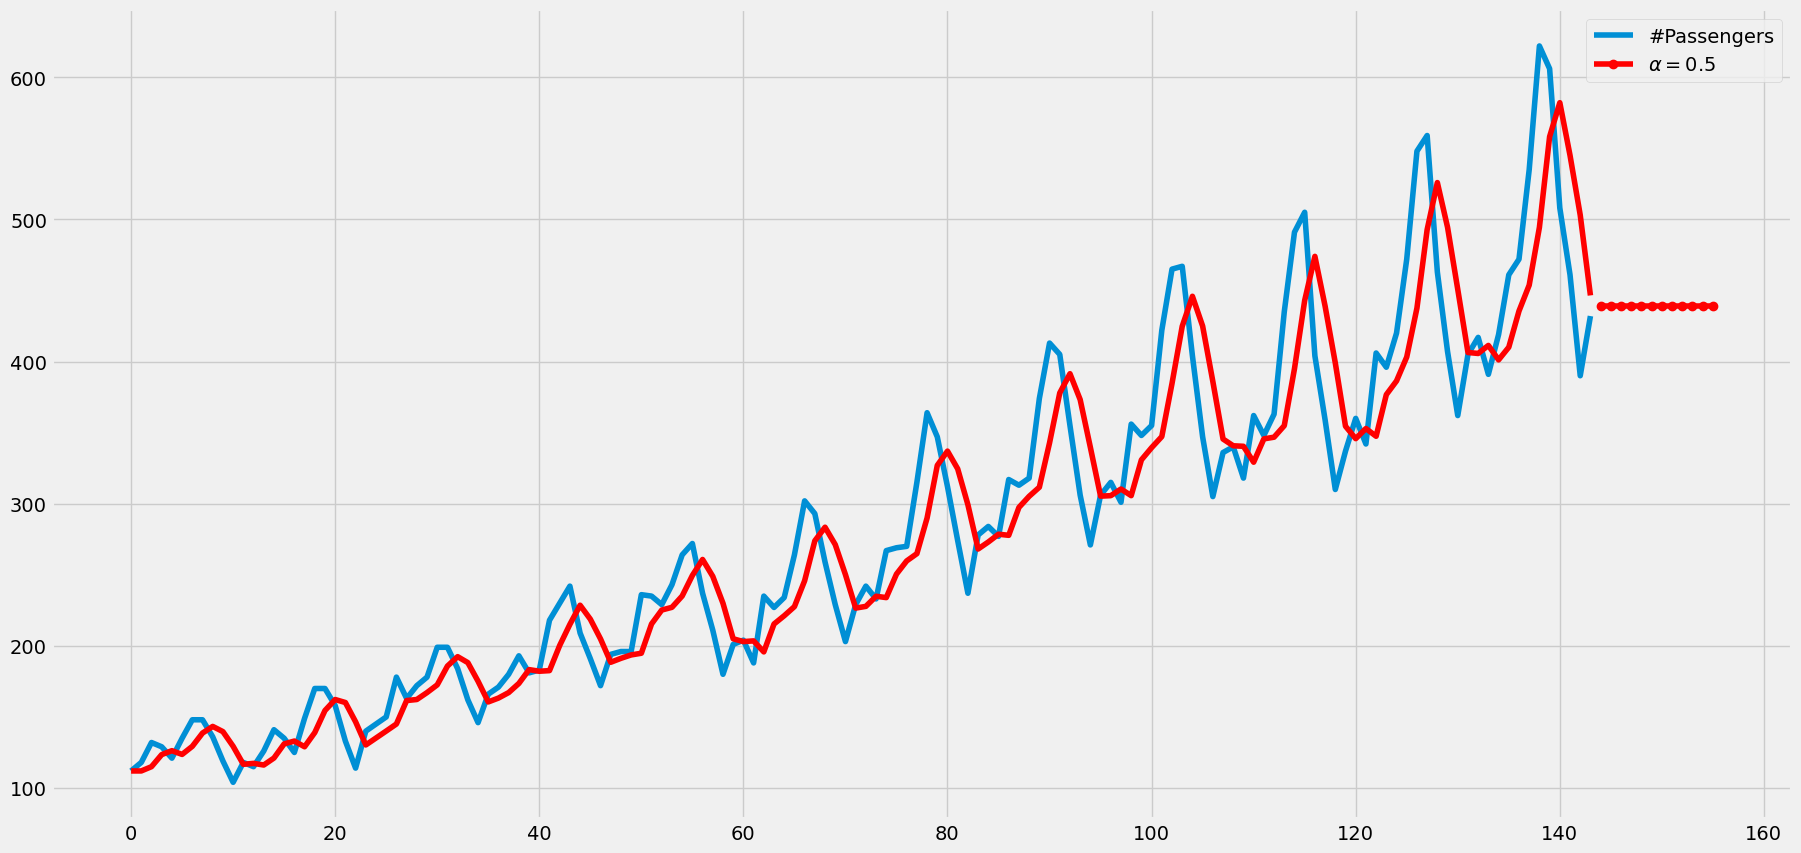

In [5]:
alpha=0.5
df = pd.read_csv('datasets/AirPassengers.csv', usecols=['#Passengers'])
df.plot.line()
fit1 = SimpleExpSmoothing(df).fit(smoothing_level=alpha, optimized=False)
fcast1 = fit1.forecast(12).rename(r'$\alpha=0.5$')
fcast1.plot(marker='o', color='red', legend=True)
fit1.fittedvalues.plot(color='red') 
plt.show()

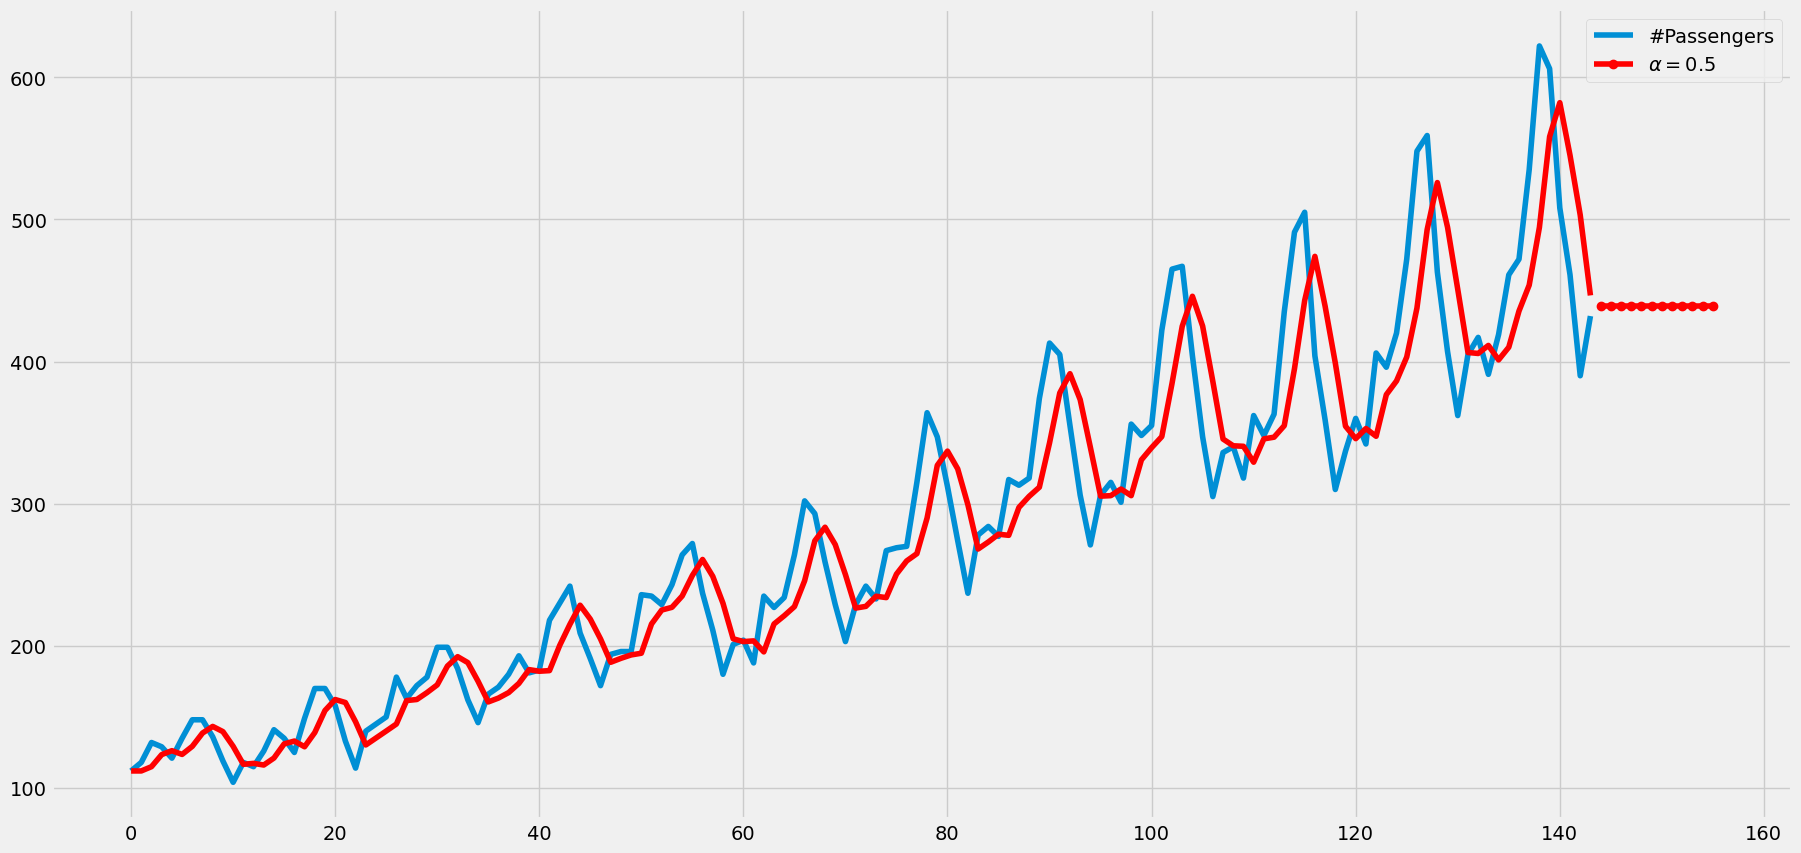

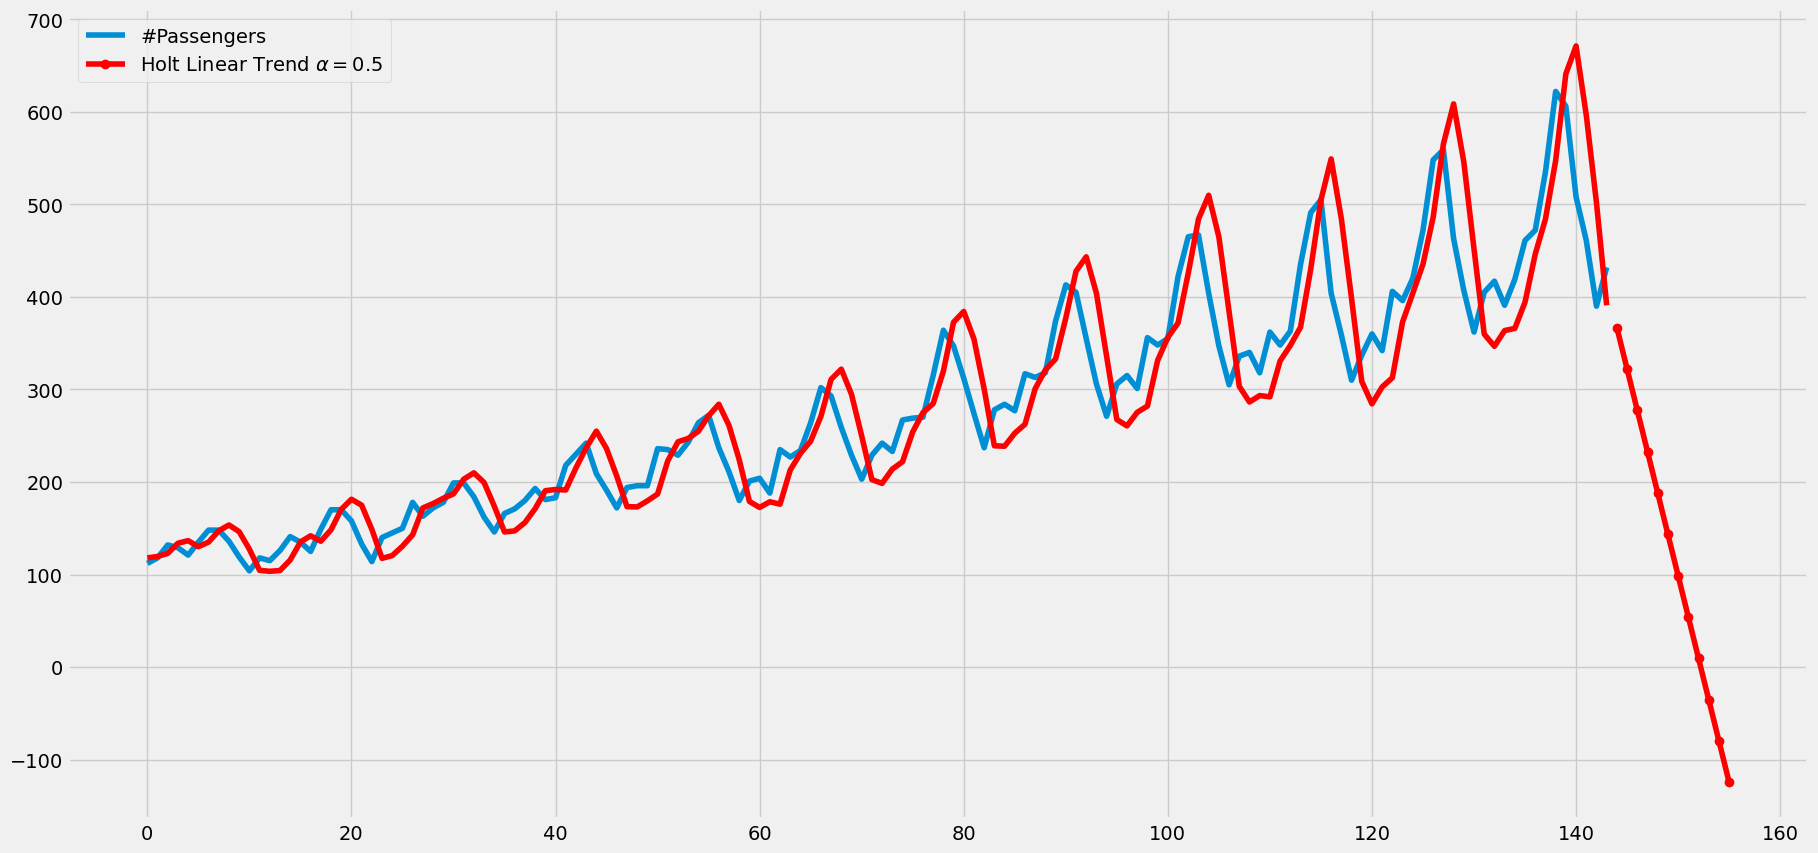

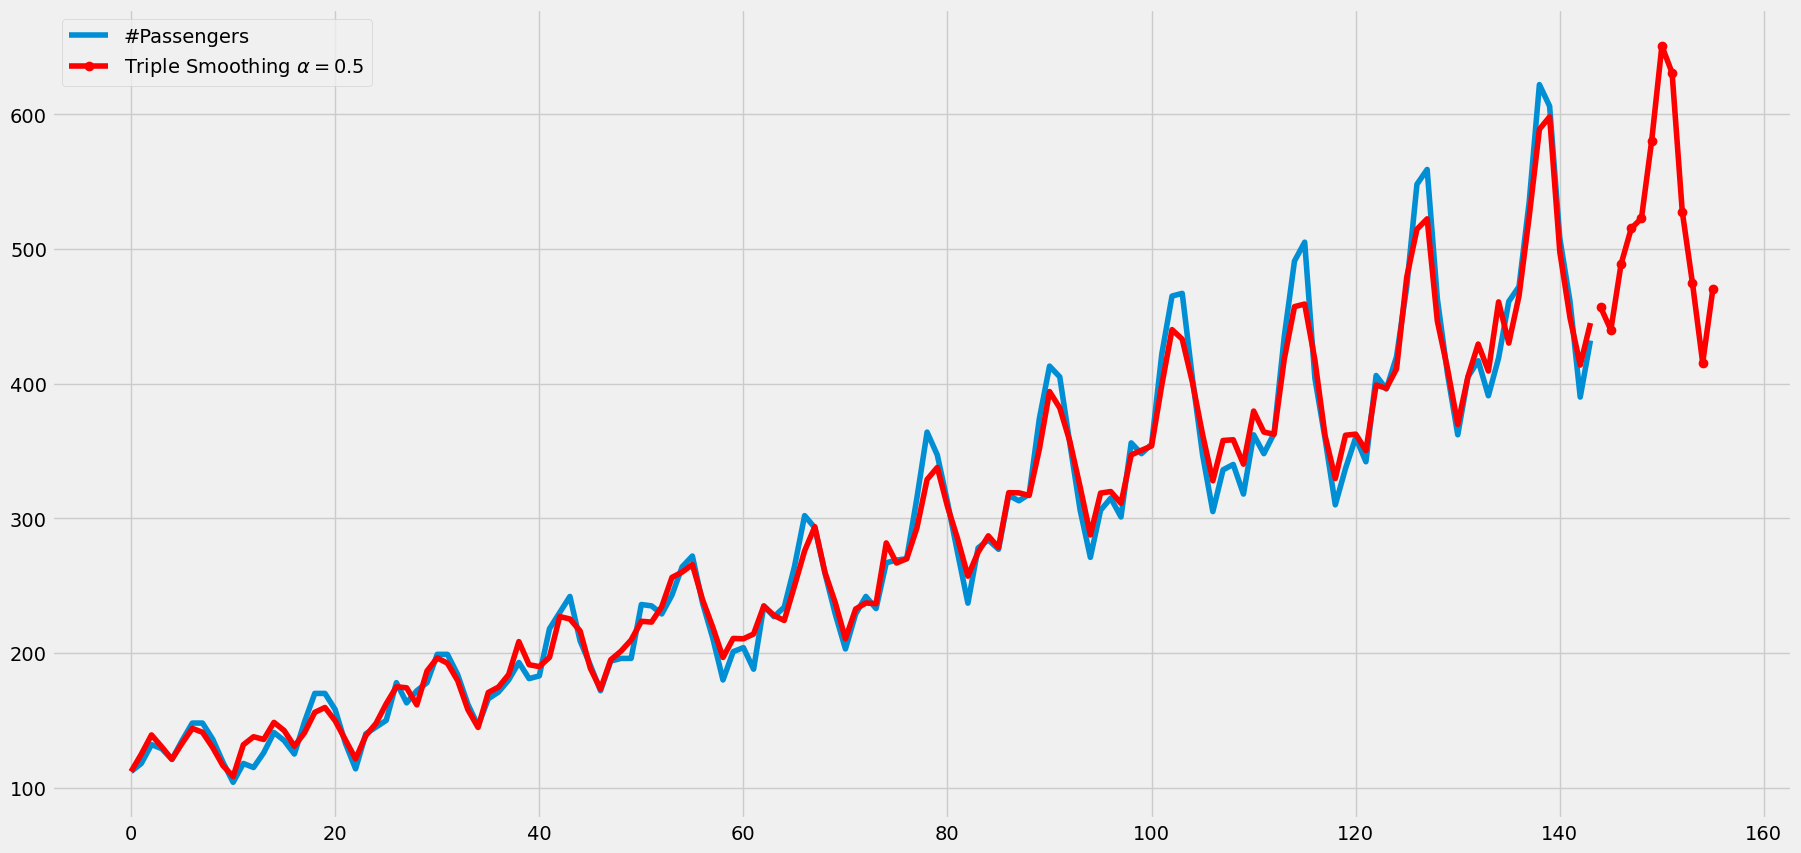

In [6]:
alpha=0.5
df = pd.read_csv('datasets/AirPassengers.csv', usecols=['#Passengers'])
df.plot.line()
fit1 = SimpleExpSmoothing(df).fit(smoothing_level=alpha, optimized=False)
fcast1 = fit1.forecast(12).rename(r'$\alpha=0.5$')
fcast1.plot(marker='o', color='red', legend=True)
fit1.fittedvalues.plot(color='red') 
plt.show()

df.plot.line()
fit1 = Holt(df).fit(smoothing_level=alpha, smoothing_trend=.5, optimized=False)
fcast1 = fit1.forecast(12).rename(r'Holt Linear Trend $\alpha=0.5$')
fcast1.plot(marker='o', color='red', legend=True)
fit1.fittedvalues.plot(color='red') 
plt.show()

df.plot.line()
fit1 = ExponentialSmoothing(df, seasonal_periods=12, trend='add', seasonal='add')
fit1 = fit1.fit(smoothing_level=alpha)
fcast1 = fit1.forecast(12).rename(r'Triple Smoothing $\alpha=0.5$')
fcast1.plot(marker='o', color='red', legend=True)
fit1.fittedvalues.plot(color='red') 
plt.show()

In [7]:
help(ExponentialSmoothing)

Help on class ExponentialSmoothing in module statsmodels.tsa.holtwinters.model:

class ExponentialSmoothing(statsmodels.tsa.base.tsa_model.TimeSeriesModel)
 |  ExponentialSmoothing(endog, trend=None, damped_trend=False, seasonal=None, *, seasonal_periods=None, initialization_method='estimated', initial_level=None, initial_trend=None, initial_seasonal=None, use_boxcox=False, bounds=None, dates=None, freq=None, missing='none')
 |  
 |  Holt Winter's Exponential Smoothing
 |  
 |  Parameters
 |  ----------
 |  endog : array_like
 |      The time series to model.
 |  trend : {"add", "mul", "additive", "multiplicative", None}, optional
 |      Type of trend component.
 |  damped_trend : bool, optional
 |      Should the trend component be damped.
 |  seasonal : {"add", "mul", "additive", "multiplicative", None}, optional
 |      Type of seasonal component.
 |  seasonal_periods : int, optional
 |      The number of periods in a complete seasonal cycle, e.g., 4 for
 |      quarterly data or 7

<AxesSubplot:>

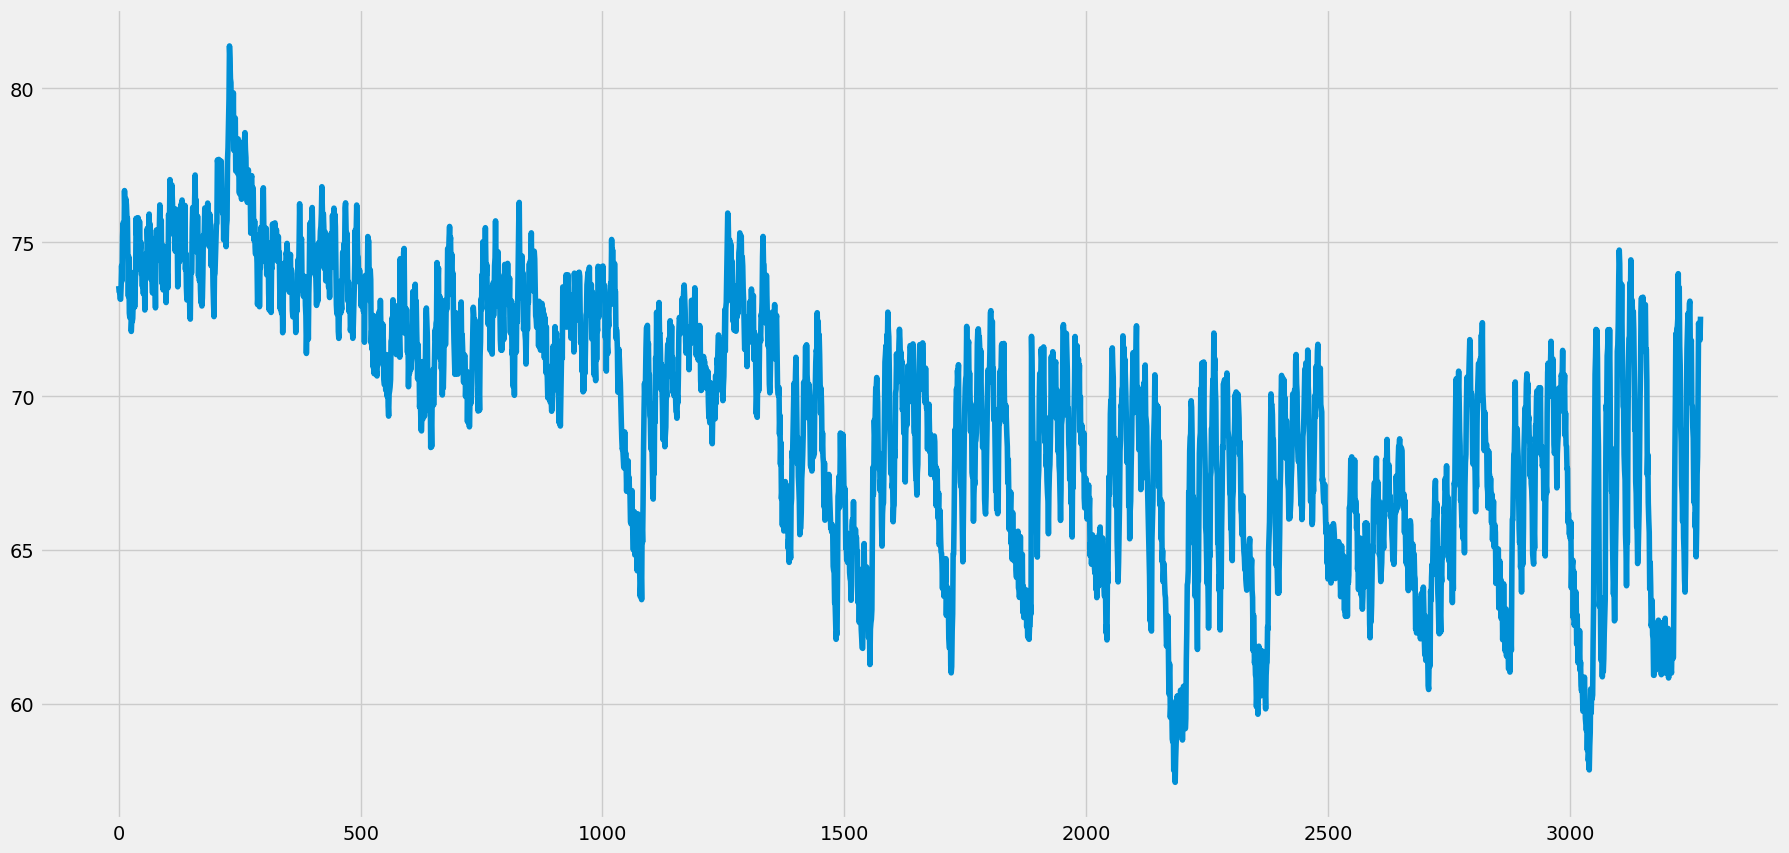

In [8]:
series = pd.read_csv('datasets/ambient_temperature_system_failure.csv')
series['timestamp'] = pd.to_datetime(series['timestamp'])
series['value'].plot()              

<AxesSubplot:>

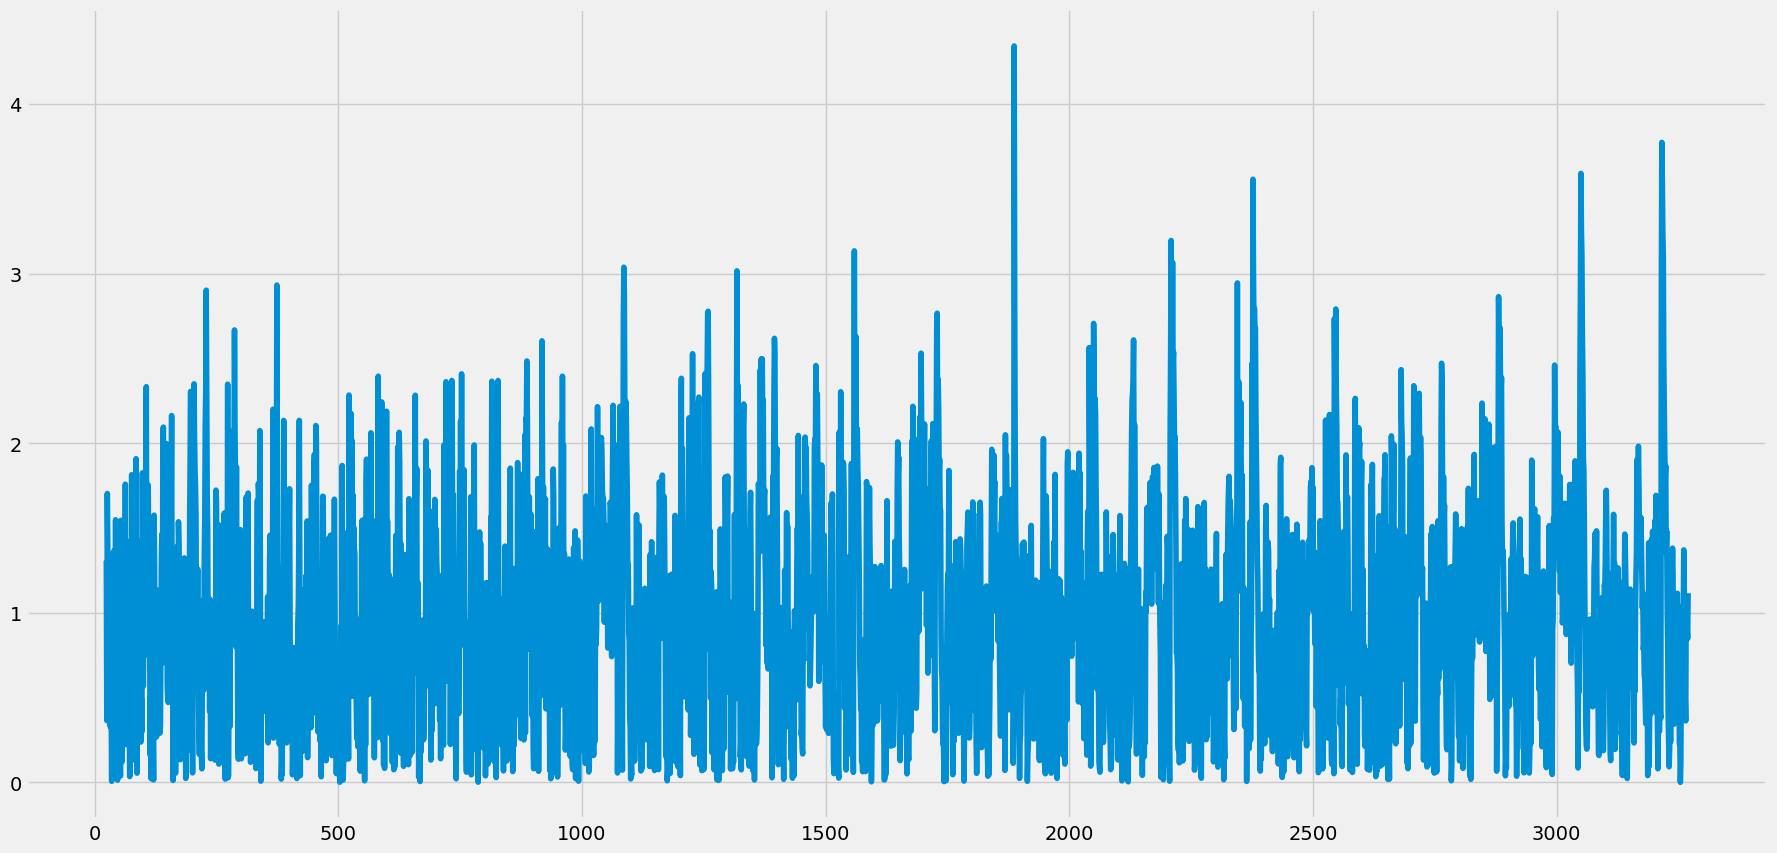

In [9]:
window_size = 25
xroll = series['value'].rolling(window_size)
series['mean_roll'] = xroll.mean()
series['sd_roll'] = xroll.std()
series['zscore'] = np.abs((series['value']-series['mean_roll'])/series['sd_roll'])
series['zscore'].plot()

In [11]:
series.loc[series['zscore'] > 3][['timestamp', 'value']]

,timestamp,value
1086,2014-02-17 13:00:00,69.519207
1318,2014-02-27 05:00:00,69.425502
1559,2014-03-10 11:00:00,67.688348
1887,2014-03-24 19:00:00,71.943363
2209,2014-04-14 10:00:00,63.873030
2212,2014-04-14 13:00:00,66.890486
2377,2014-04-21 10:00:00,64.916813
2378,2014-04-21 11:00:00,65.396986
3050,2014-05-19 11:00:00,66.461085
3051,2014-05-19 12:00:00,68.261759


### Application of Smoothing methods on US Energy Data

<AxesSubplot:>

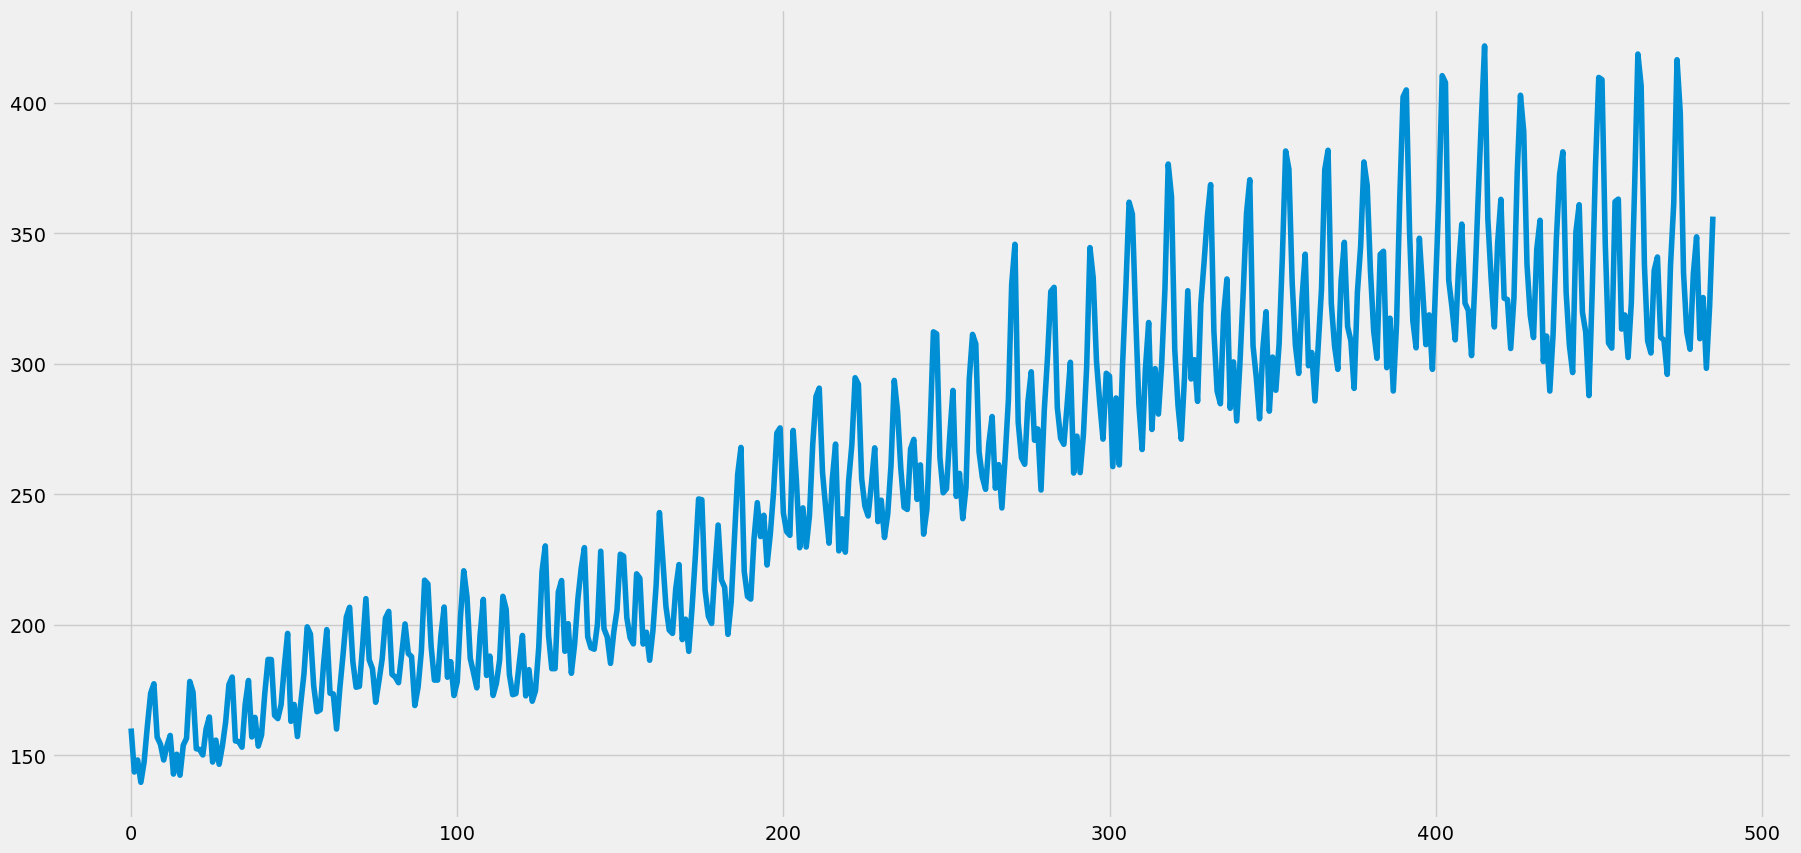

In [35]:
df = pd.read_csv('datasets/us_energy.csv')
df['value'].plot()

<AxesSubplot:xlabel='date'>

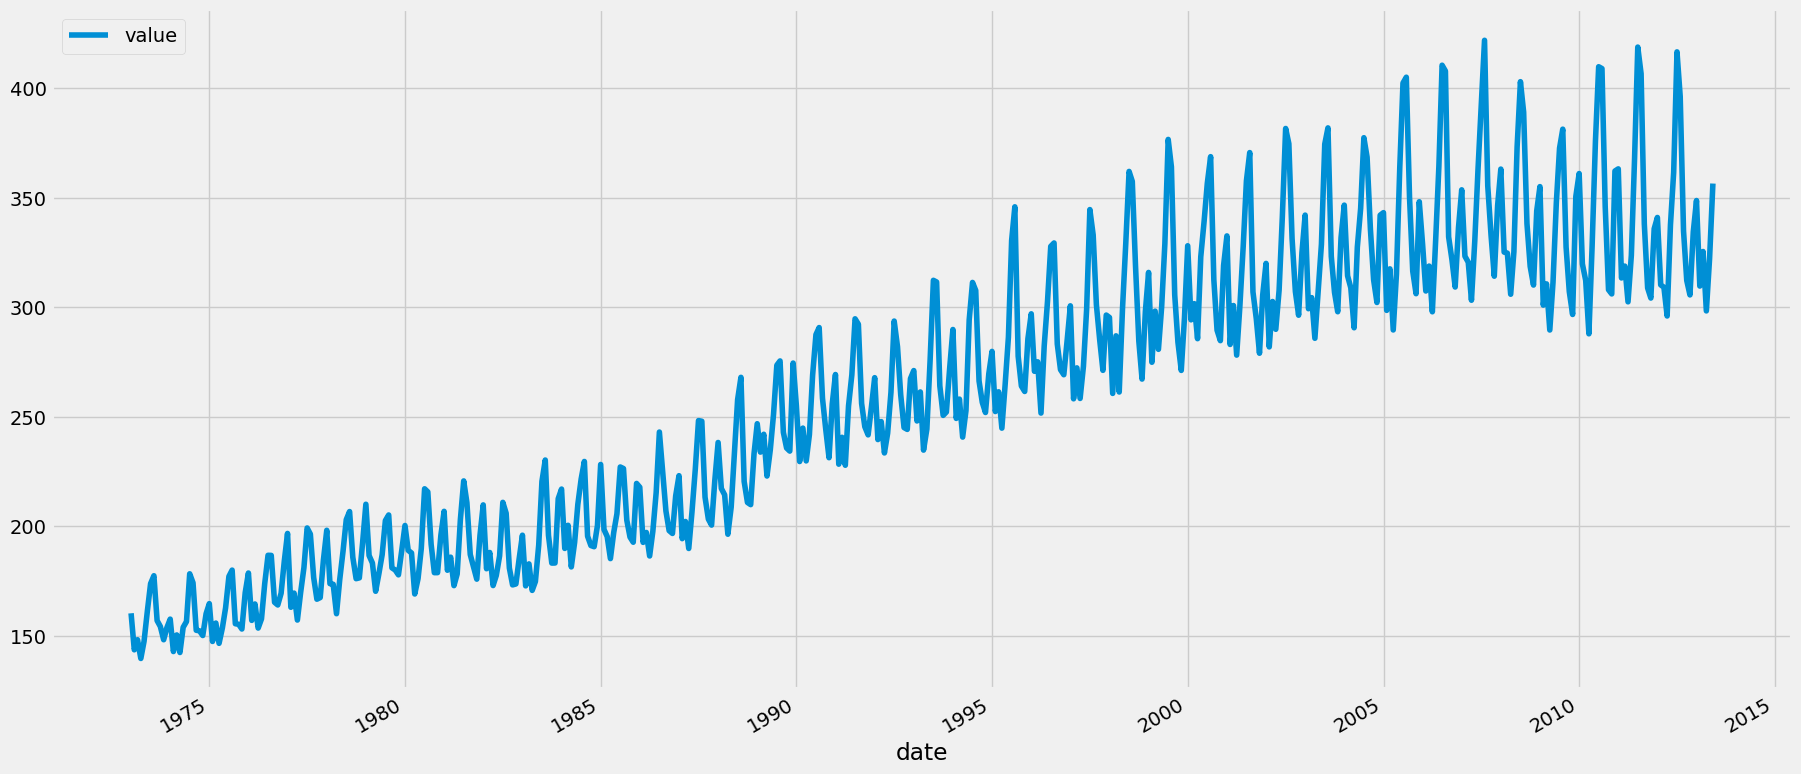

In [36]:
### Convert data to datetime index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df.plot()

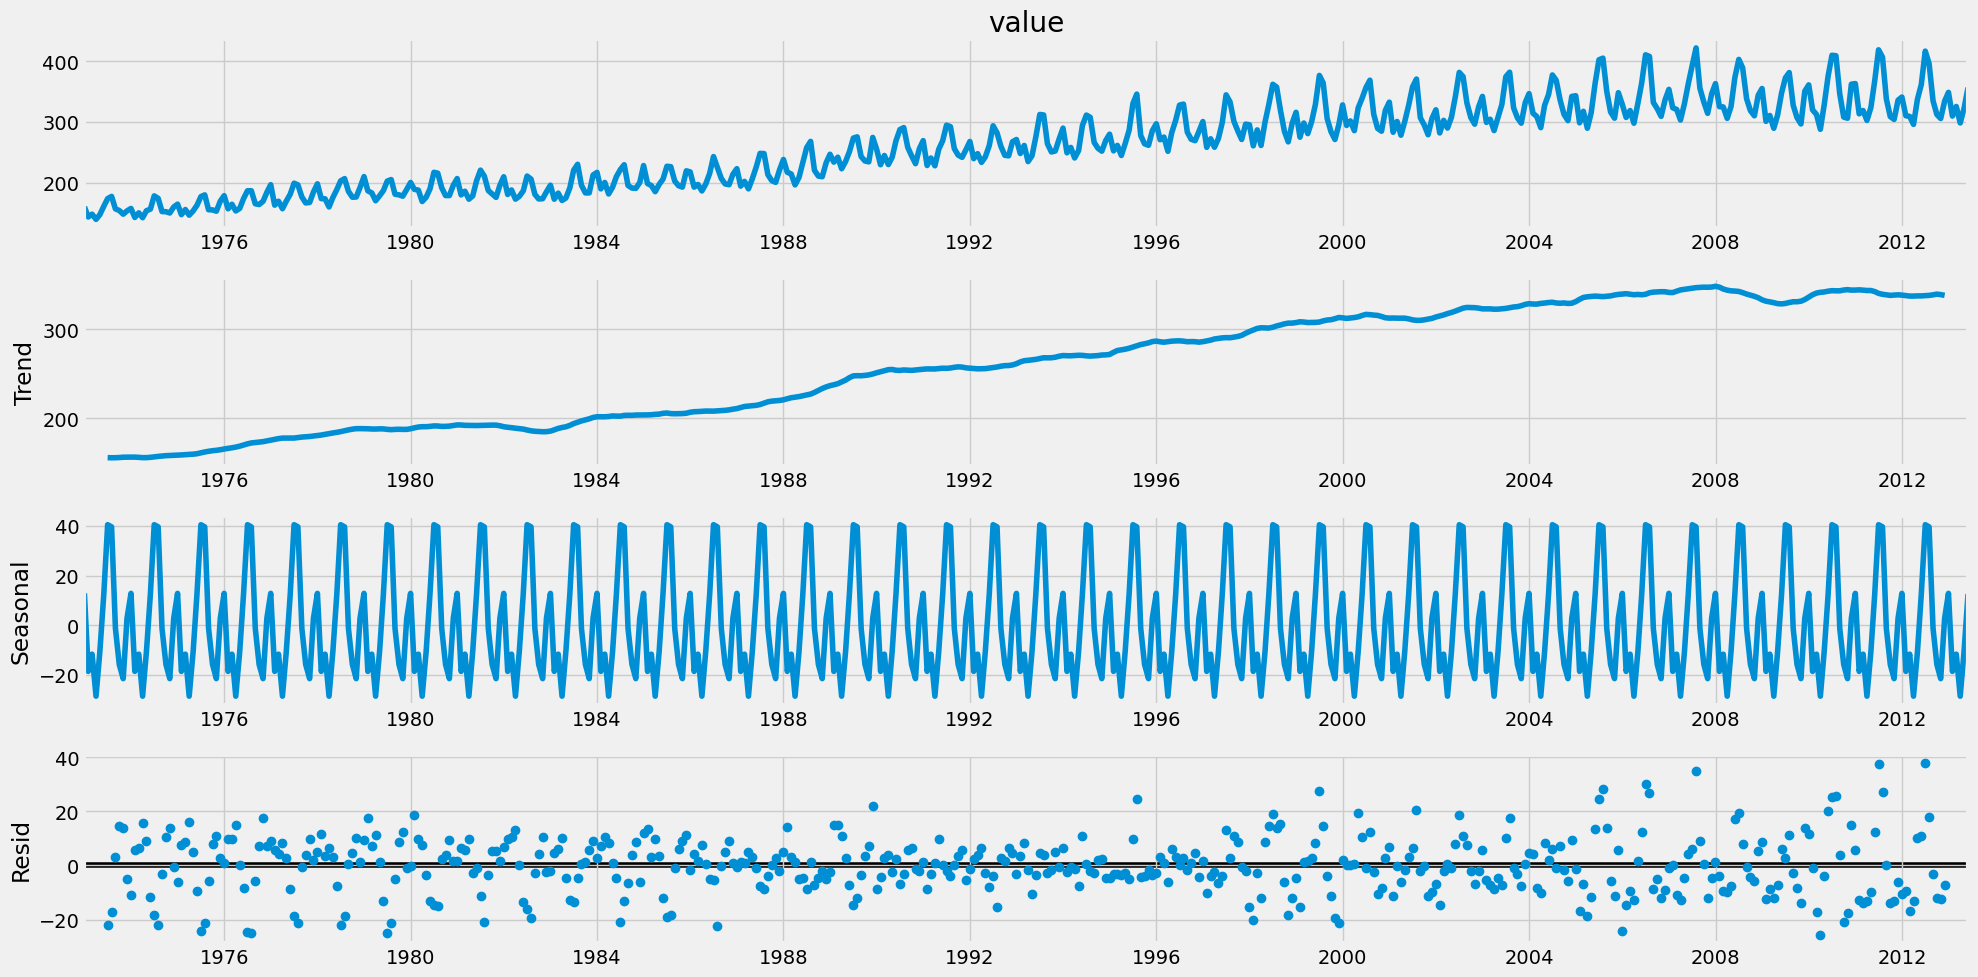

In [37]:
decomposition = sm.tsa.seasonal_decompose(df["value"], period=12, model="additive")
figure = decomposition.plot()
plt.show()

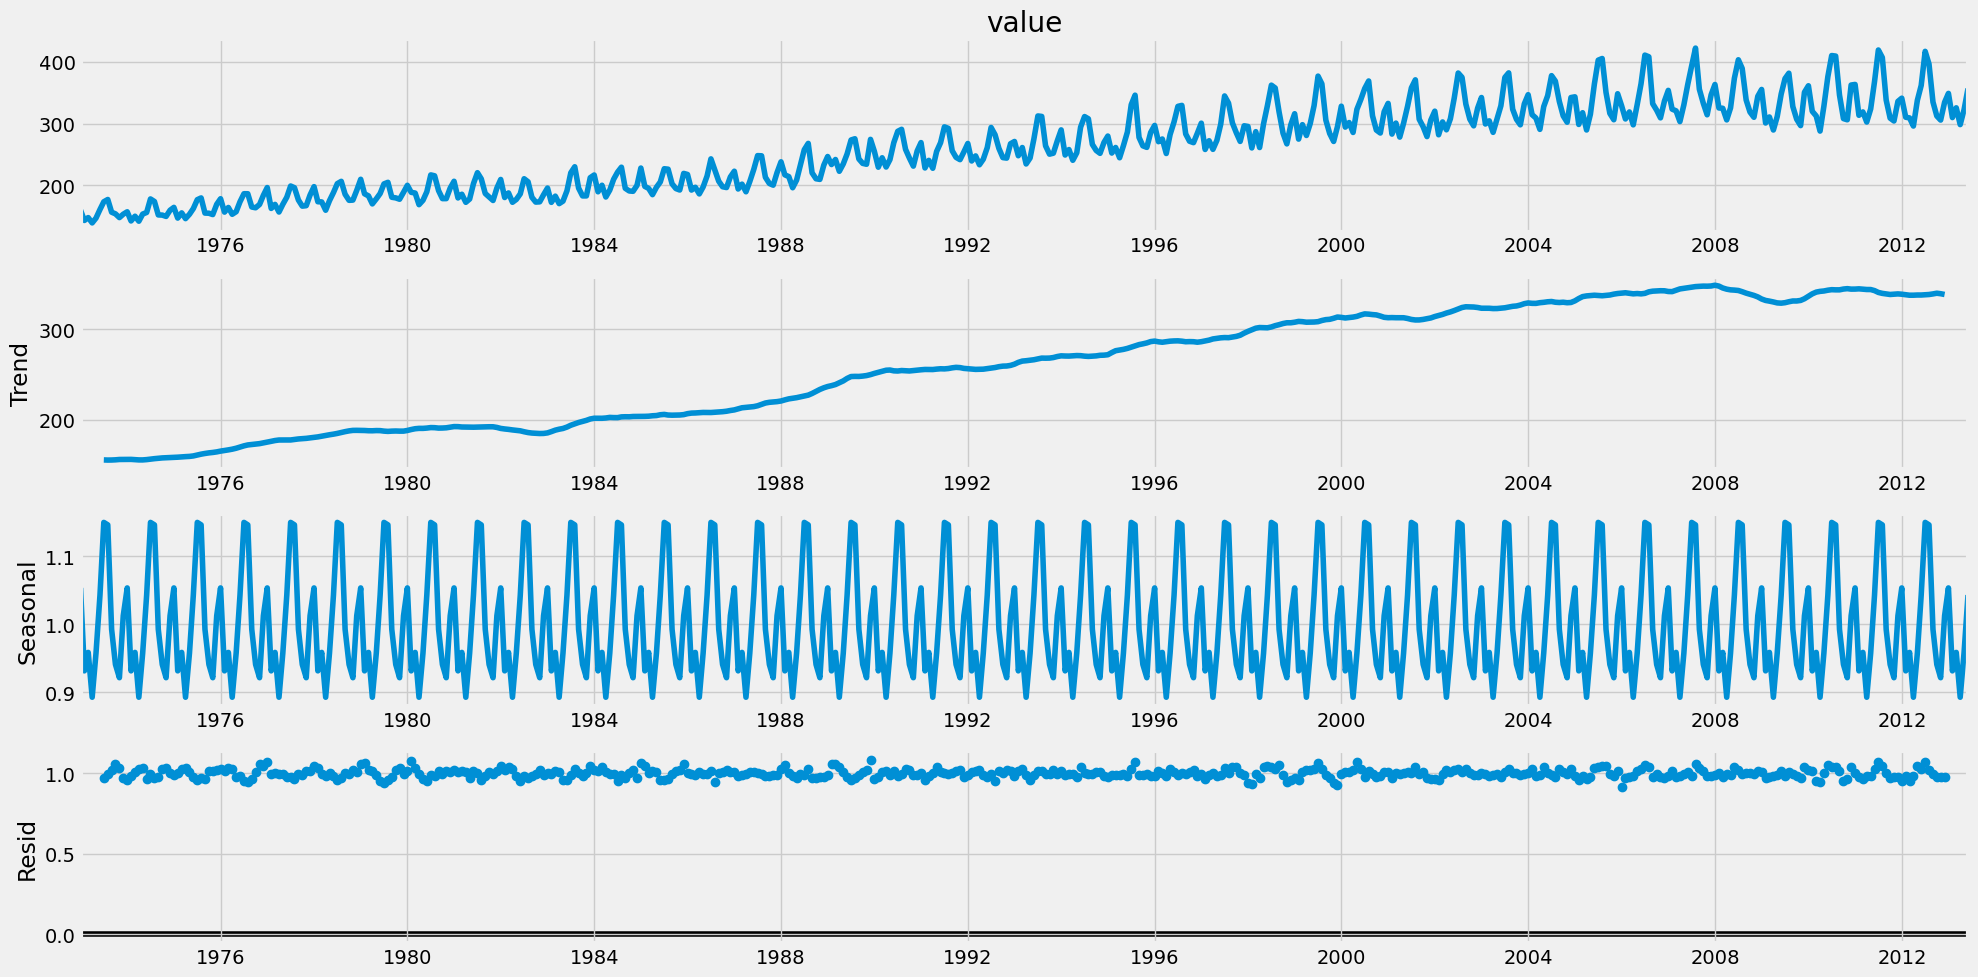

In [38]:
decomposition = sm.tsa.seasonal_decompose(df["value"], period=12, model="multiplicative")
figure = decomposition.plot()
plt.show()

In [44]:
cutoff_date = '2005-12-31'
xtrain, xvalid = df.loc[df.index <= cutoff_date], df.loc[df.index > cutoff_date]
print(xtrain.shape, xvalid.shape)

(397, 1) (89, 1)


In [45]:
fit1 = ExponentialSmoothing(xtrain, seasonal_periods=12, trend='mul', seasonal='mul', use_boxcox=True)
fit1 = fit1.fit()
# fcast1 = fit1.forecast(len(xvalid).rename(r'Triple Smoothing $\alpha=0.5$')
# fcast1.plot(marker='o', color='red', legend=True)
# fit1.fittedvalues.plot(color='red') 
# plt.show()
fit1.params_formatted

/Users/mananshah/miniforge3/envs/ts_env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mananshah/miniforge3/envs/ts_env/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


,name,param,optimized
smoothing_level,alpha,2.903259e-01,True
smoothing_trend,beta,2.743321e-17,True
smoothing_seasonal,gamma,1.898882e-01,True
initial_level,l.0,5.447313e+00,True
initial_trend,b.0,1.000400e+00,True
initial_seasons.0,s.0,1.011019e+00,True
initial_seasons.1,s.1,9.846564e-01,True
initial_seasons.2,s.2,9.908981e-01,True
initial_seasons.3,s.3,9.758962e-01,True
initial_seasons.4,s.4,9.871379e-01,True


/Users/mananshah/miniforge3/envs/ts_env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/var/folders/b9/d6hxbcwn2b57xb2rz_lg4h0w0000gn/T/ipykernel_1089/679450173.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xvalid['predictions'] = list(predictions)


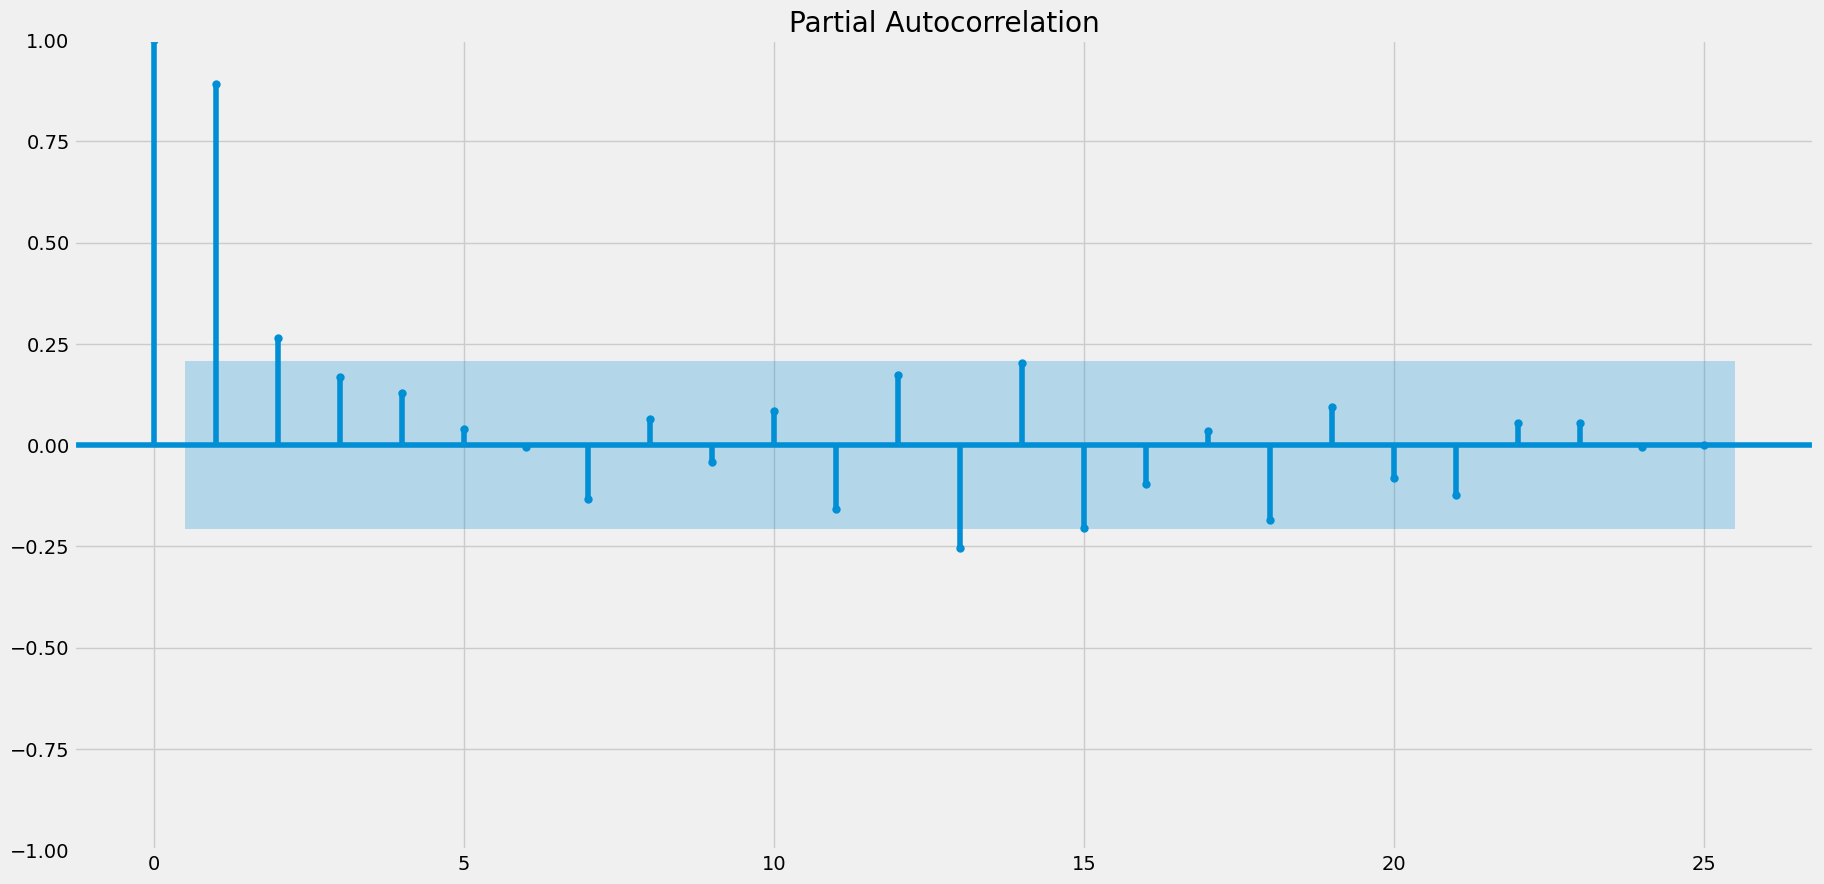

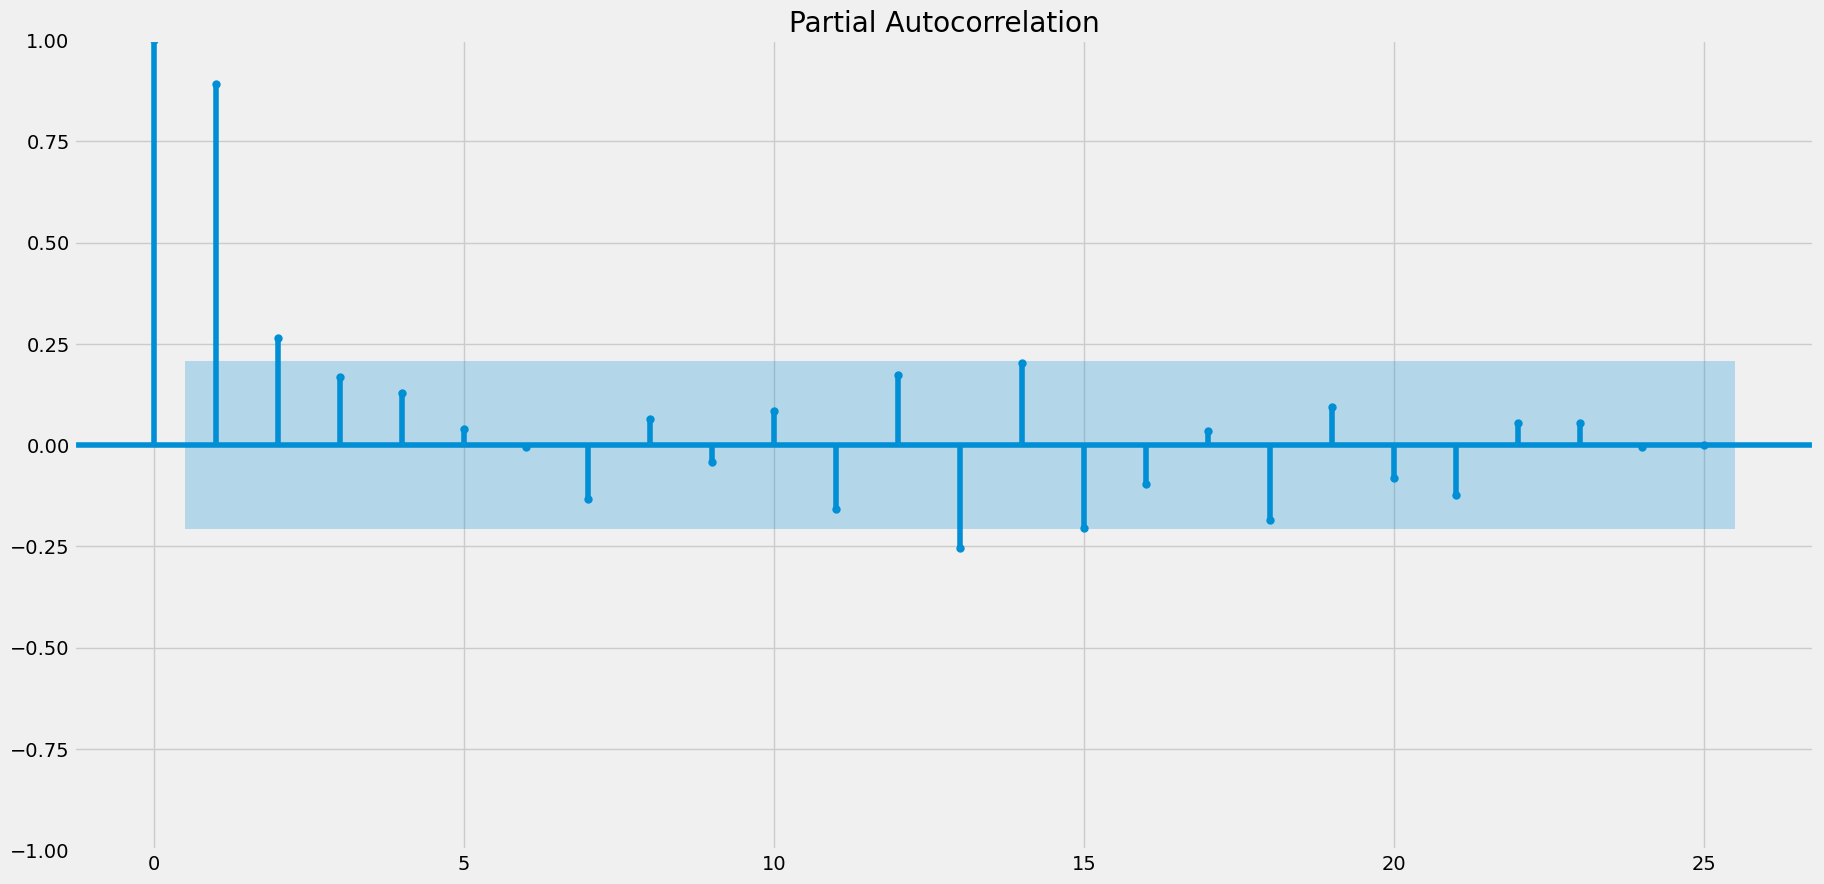

In [50]:
predictions = fit1.forecast(len(xvalid)).copy()
xvalid['predictions'] = list(predictions)
xresiduals = xvalid['value'] - xvalid['predictions']
plot_pacf(xresiduals, lags=25)

<AxesSubplot:xlabel='date'>

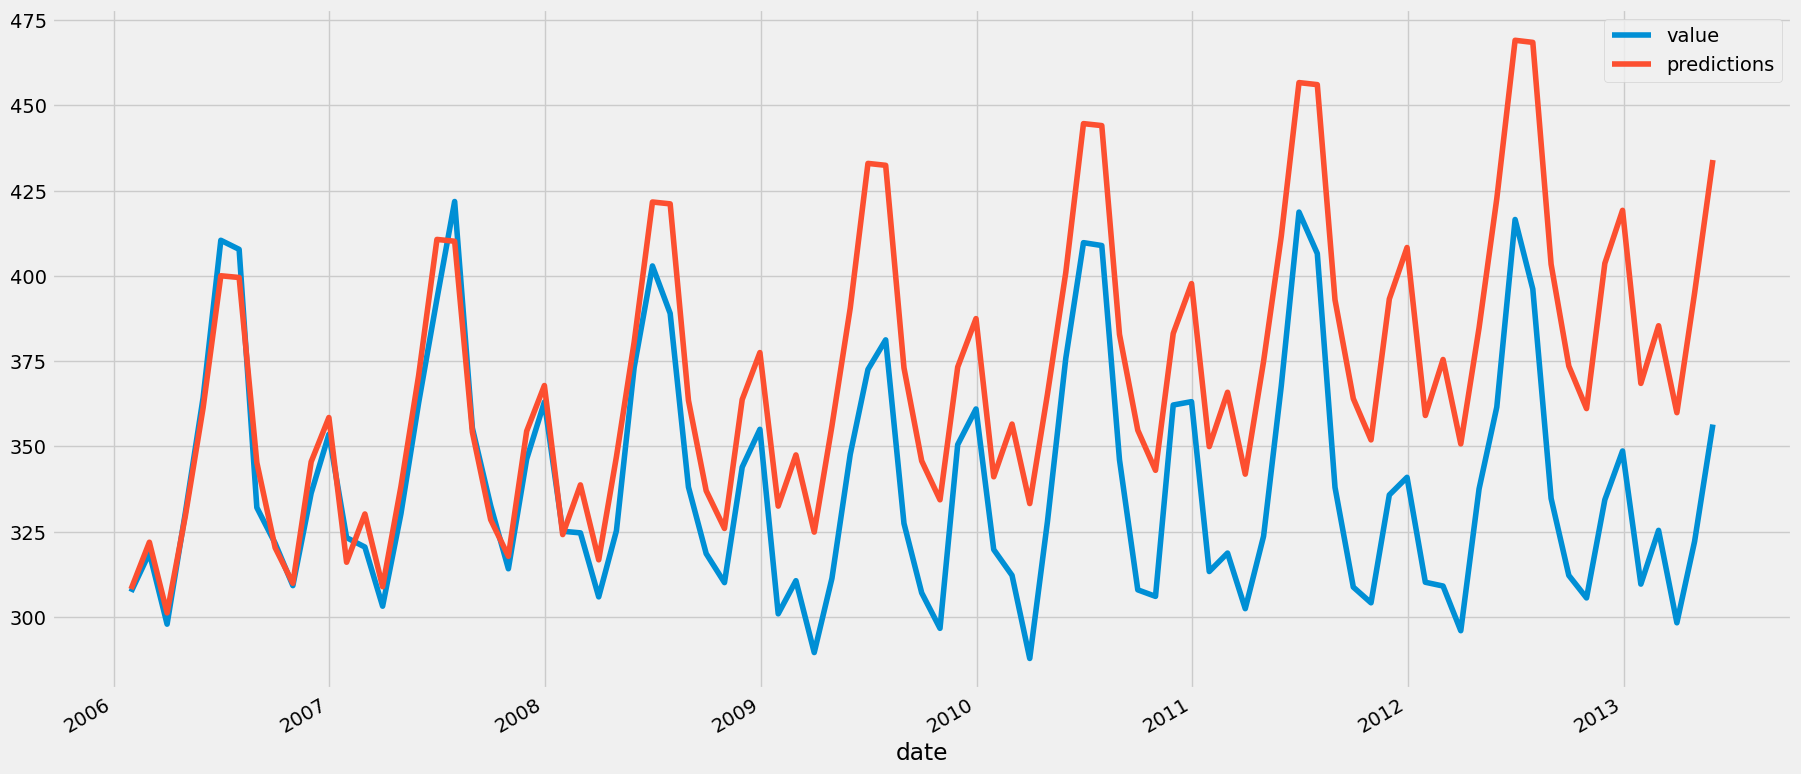

In [49]:
xvalid.plot()